# **Project Name : Comcast Telecom Consumer Complaints**  

## DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

## **Data Dictionary**

* Ticket #: Ticket number assigned to each complaint
* Customer Complaint: Description of complaint
* Date: Date of complaint
* Time: Time of complaint
* Received Via: Mode of communication of the complaint
* City: Customer city
* State: Customer state
* Zipcode: Customer zip
* Status: Status of complaint
* Filing on behalf of someone

## **Analysis Task**

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints

Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile as zf
files=zf.ZipFile("comcast.zip",'a')
files.extractall('directory to extract')
files.close()

In [3]:
comcast=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comcast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
## Datetime series analysis

In [7]:
import datetime
comcast.Date = pd.to_datetime(comcast.Date, format='%d-%m-%y')

In [8]:
month = comcast['Date'].dt.month.astype(str)
year=comcast['Date'].dt.year.astype(str)
comcast['month_year']= month.str.cat(year, sep ="-")

In [9]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
month_year                             object
dtype: object

In [10]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_year
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4-2015
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8-2015
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4-2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7-2015
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5-2015


In [11]:
comcast["Date"].value_counts()[:10]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-12-06     43
2015-06-27     39
2015-06-15     34
Name: Date, dtype: int64

**Provide the trend chart for the number of complaints at monthly and daily granularity levels.**

<AxesSubplot:xlabel='day', ylabel='count'>

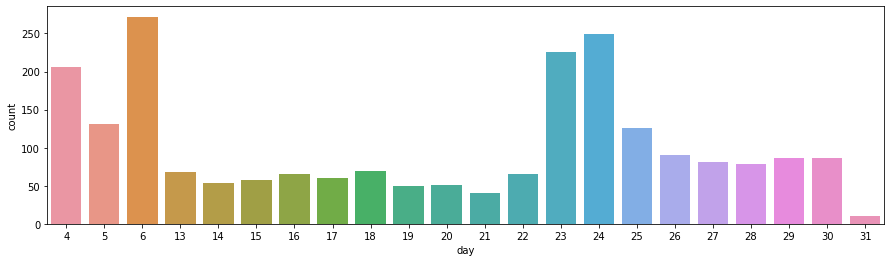

In [12]:
comcast['day']=comcast['Date'].dt.day
plt.figure(figsize=(15,4))
sns.countplot(x="day",data=comcast)
# trend at daily granulities
# Maximum complaints are recieved on 6th day of month.

<AxesSubplot:xlabel='month_year', ylabel='count'>

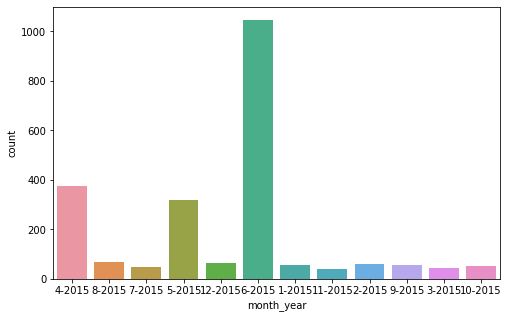

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='month_year',data=comcast)
## trend at monthly granularity levels
# Maximum complaints are registered in June-2015

## Provide a table with the frequency of complaint types.

In [14]:
comcast['Customer Complaint'].str.lower().value_counts()

comcast                                                   102
comcast data cap                                           30
comcast internet                                           29
comcast data caps                                          21
comcast billing                                            18
                                                         ... 
comcast billing (primary) service (secondary)               1
overcharged internet billing                                1
bills/identity                                              1
concern about comcast internet modem billing practices      1
comcast internet in emeryville throttles speed              1
Name: Customer Complaint, Length: 1740, dtype: int64

In [29]:
import nltk
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = comcast['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

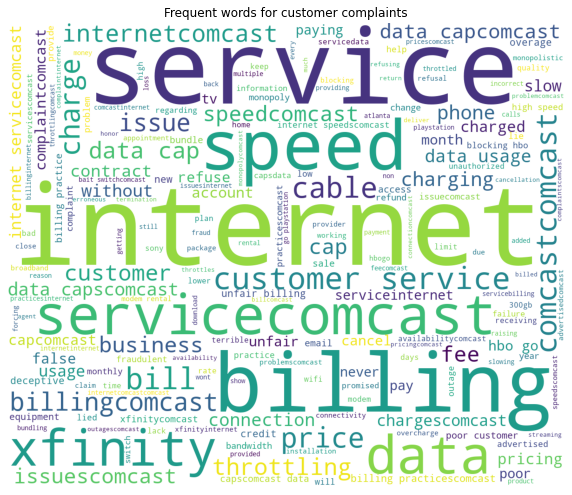

In [17]:
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(common_complaints)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()                   

 **Create a new categorical variable with value as Open and Closed.**  
  **Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.**


In [18]:
comcast.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [19]:
comcast['new_status']= ['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in comcast['Status']]

In [20]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_year,day,new_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4-2015,22,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8-2015,4,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4-2015,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7-2015,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5-2015,26,Closed


In [21]:
# **Provide state wise status of complaints in a stacked bar chart.**
comcast.groupby(['State']).size().sort_values(ascending=False).to_frame().reset_index().rename({0:'Count'},axis=1)[ :6]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130


In [22]:
state_complaints=comcast.groupby(['State','new_status']).size().unstack().fillna(0)
state_complaints

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

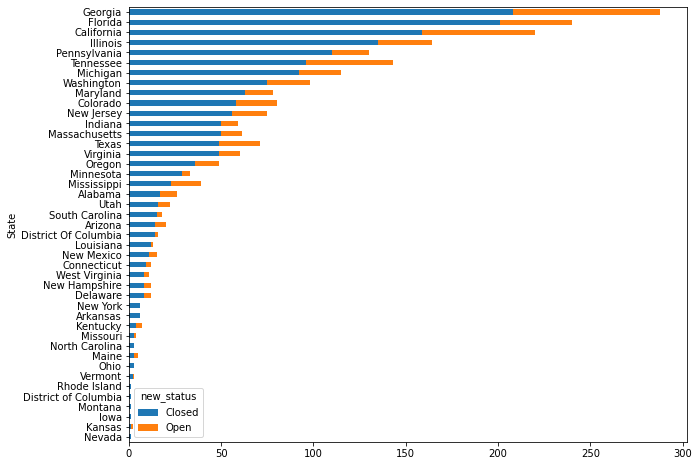

In [23]:
state_complaints.sort_values('Closed',axis = 0,ascending=True).plot(kind='barh', figsize=(10,8),stacked=True)

##### Which state has the maximum complaints?

##### Which state has the highest percentage of unresolved complaints?

In [24]:
comcast.groupby(['State']).size().sort_values(ascending=False).to_frame().reset_index().rename({0:'Count'},axis=1)[ :1]

,State,Count
0,Georgia,288


### ans. Georgia has the maximum complaints.

In [25]:
state_complaints['Open'].mean()

12.023255813953488

In [26]:
state_complaints['Perc_Unres'] = state_complaints['Open']/ state_complaints['Open'].sum()*100
state_complaints.sort_values("Perc_Unres", axis = 0, ascending = False)[:6]

new_status,Closed,Open,Perc_Unres
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743


#### Georgia has the maximum unresolved complaints

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [27]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_year,day,new_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4-2015,22,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8-2015,4,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4-2015,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7-2015,5,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5-2015,26,Closed


In [28]:
compl_res = comcast.groupby(['Received Via','new_status']).size().unstack().fillna(0)
compl_res['resolved'] = compl_res['Closed']/compl_res['Closed'].sum()*100
compl_res['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64